### Import Libraries

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,f1_score, recall_score

import warnings 
warnings.filterwarnings('ignore')


#### Import Dataset

In [3]:
df=pd.read_csv("horse.csv")
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


## Explaratory Data Analysis

In [4]:
df.shape

(299, 28)

In [5]:
df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [6]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [7]:
df.isnull().sum().sum()

1602

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [9]:
#checking how many types of value each attribute have.

df.nunique().sort_values()

surgery                    2
surgical_lesion            2
lesion_3                   2
cp_data                    2
age                        2
nasogastric_tube           3
capillary_refill_time      3
nasogastric_reflux         3
outcome                    3
abdomo_appearance          3
temp_of_extremities        4
peripheral_pulse           4
peristalsis                4
abdominal_distention       4
rectal_exam_feces          4
pain                       5
abdomen                    5
lesion_2                   6
mucous_membrane            6
nasogastric_reflux_ph     20
abdomo_protein            37
rectal_temp               40
respiratory_rate          40
packed_cell_volume        50
pulse                     52
lesion_1                  61
total_protein             80
hospital_number          283
dtype: int64

In [10]:
df.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [11]:
#setting the target variable
target = 'outcome'
df['outcome'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

Our target varible has 3 types of entries.

In [12]:
#As hospital number has no importance in our model, we can simply drop it

df.drop(['hospital_number'], axis=1, inplace=True)


In [13]:
df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [14]:
labels = ['died', 'euthanized', 'lived']
features = [i for i in df.columns.values if i not in [target]]
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))


Inference: The Datset consists of 27 features & 299 samples.


In [15]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 8 numerical & 18 categorical features.


In [16]:
#Checking the stats of all the columns

display(df.describe())

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


         Target Variable Distribution         


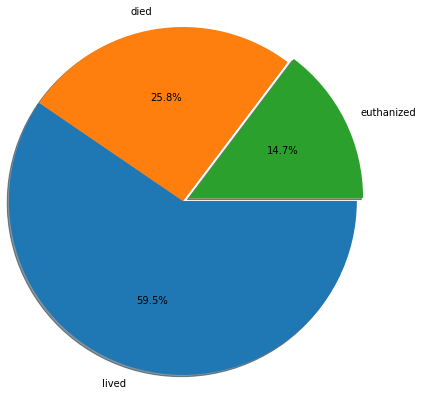

In [17]:
myexplode=[0,0,0.08]
print('\033[1mTarget Variable Distribution'.center(50))


plt.pie(df[target].value_counts(), labels=df[target].value_counts().index, counterclock=False, shadow=True, 
         explode=myexplode, autopct='%1.1f%%', radius=2, startangle=0)
plt.show()

Our Target variable data is imbalanced. We have to rescale it for further use.

                               Visualising Categorical Features:                                


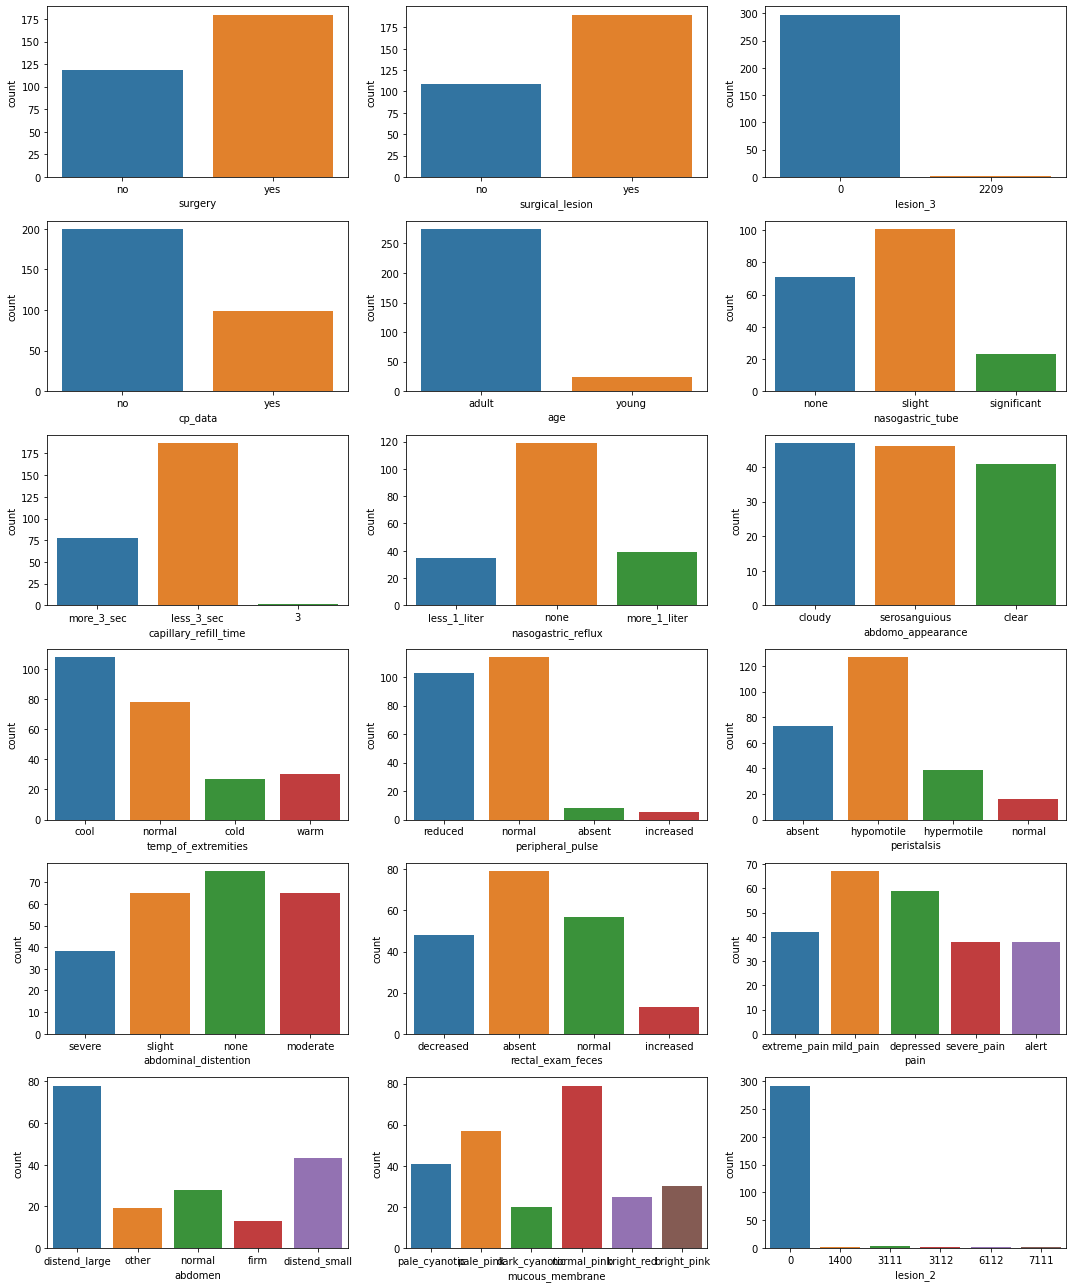

In [18]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=6:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(df[cf[i]])
plt.tight_layout()
plt.show()

                                     Features Distribution                                      


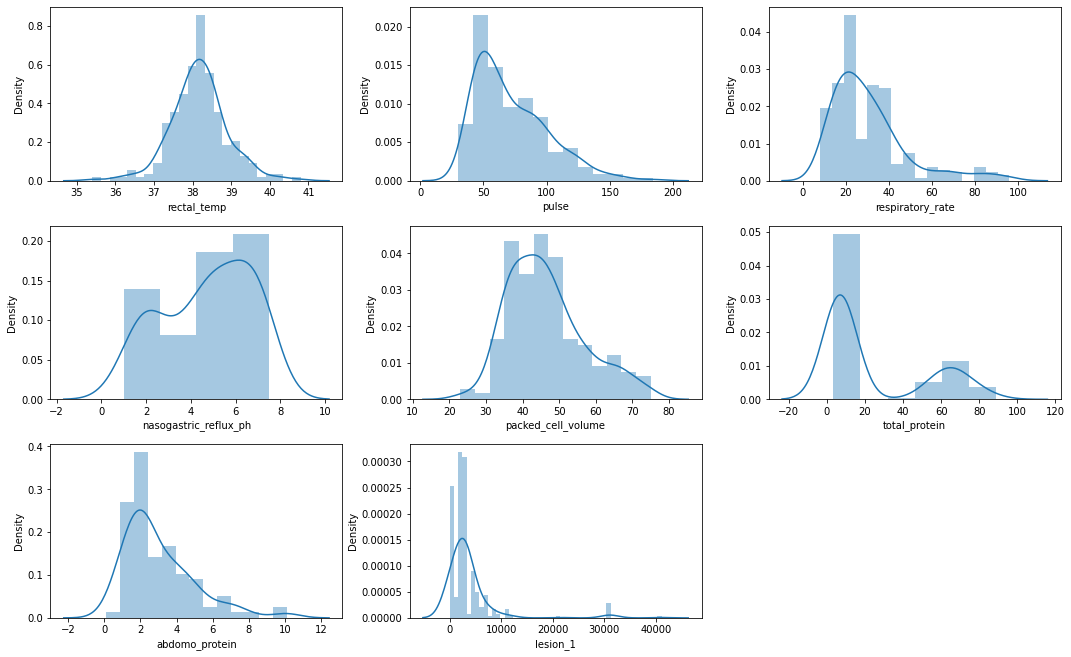

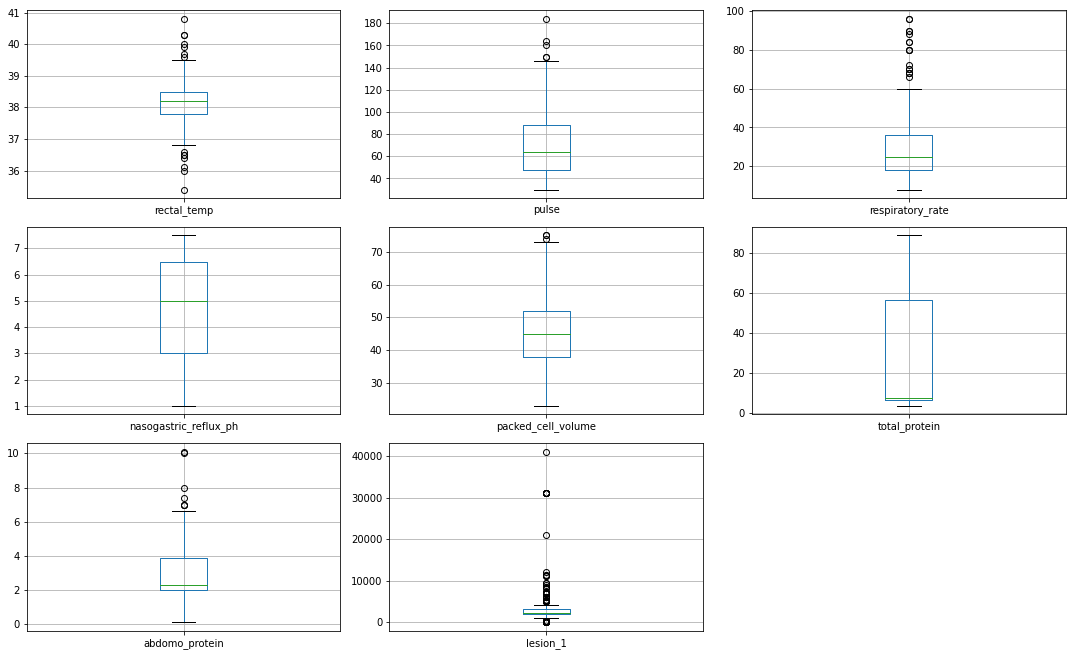

In [19]:
#Understanding the feature set

print('\033[1mFeatures Distribution'.center(100))

nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

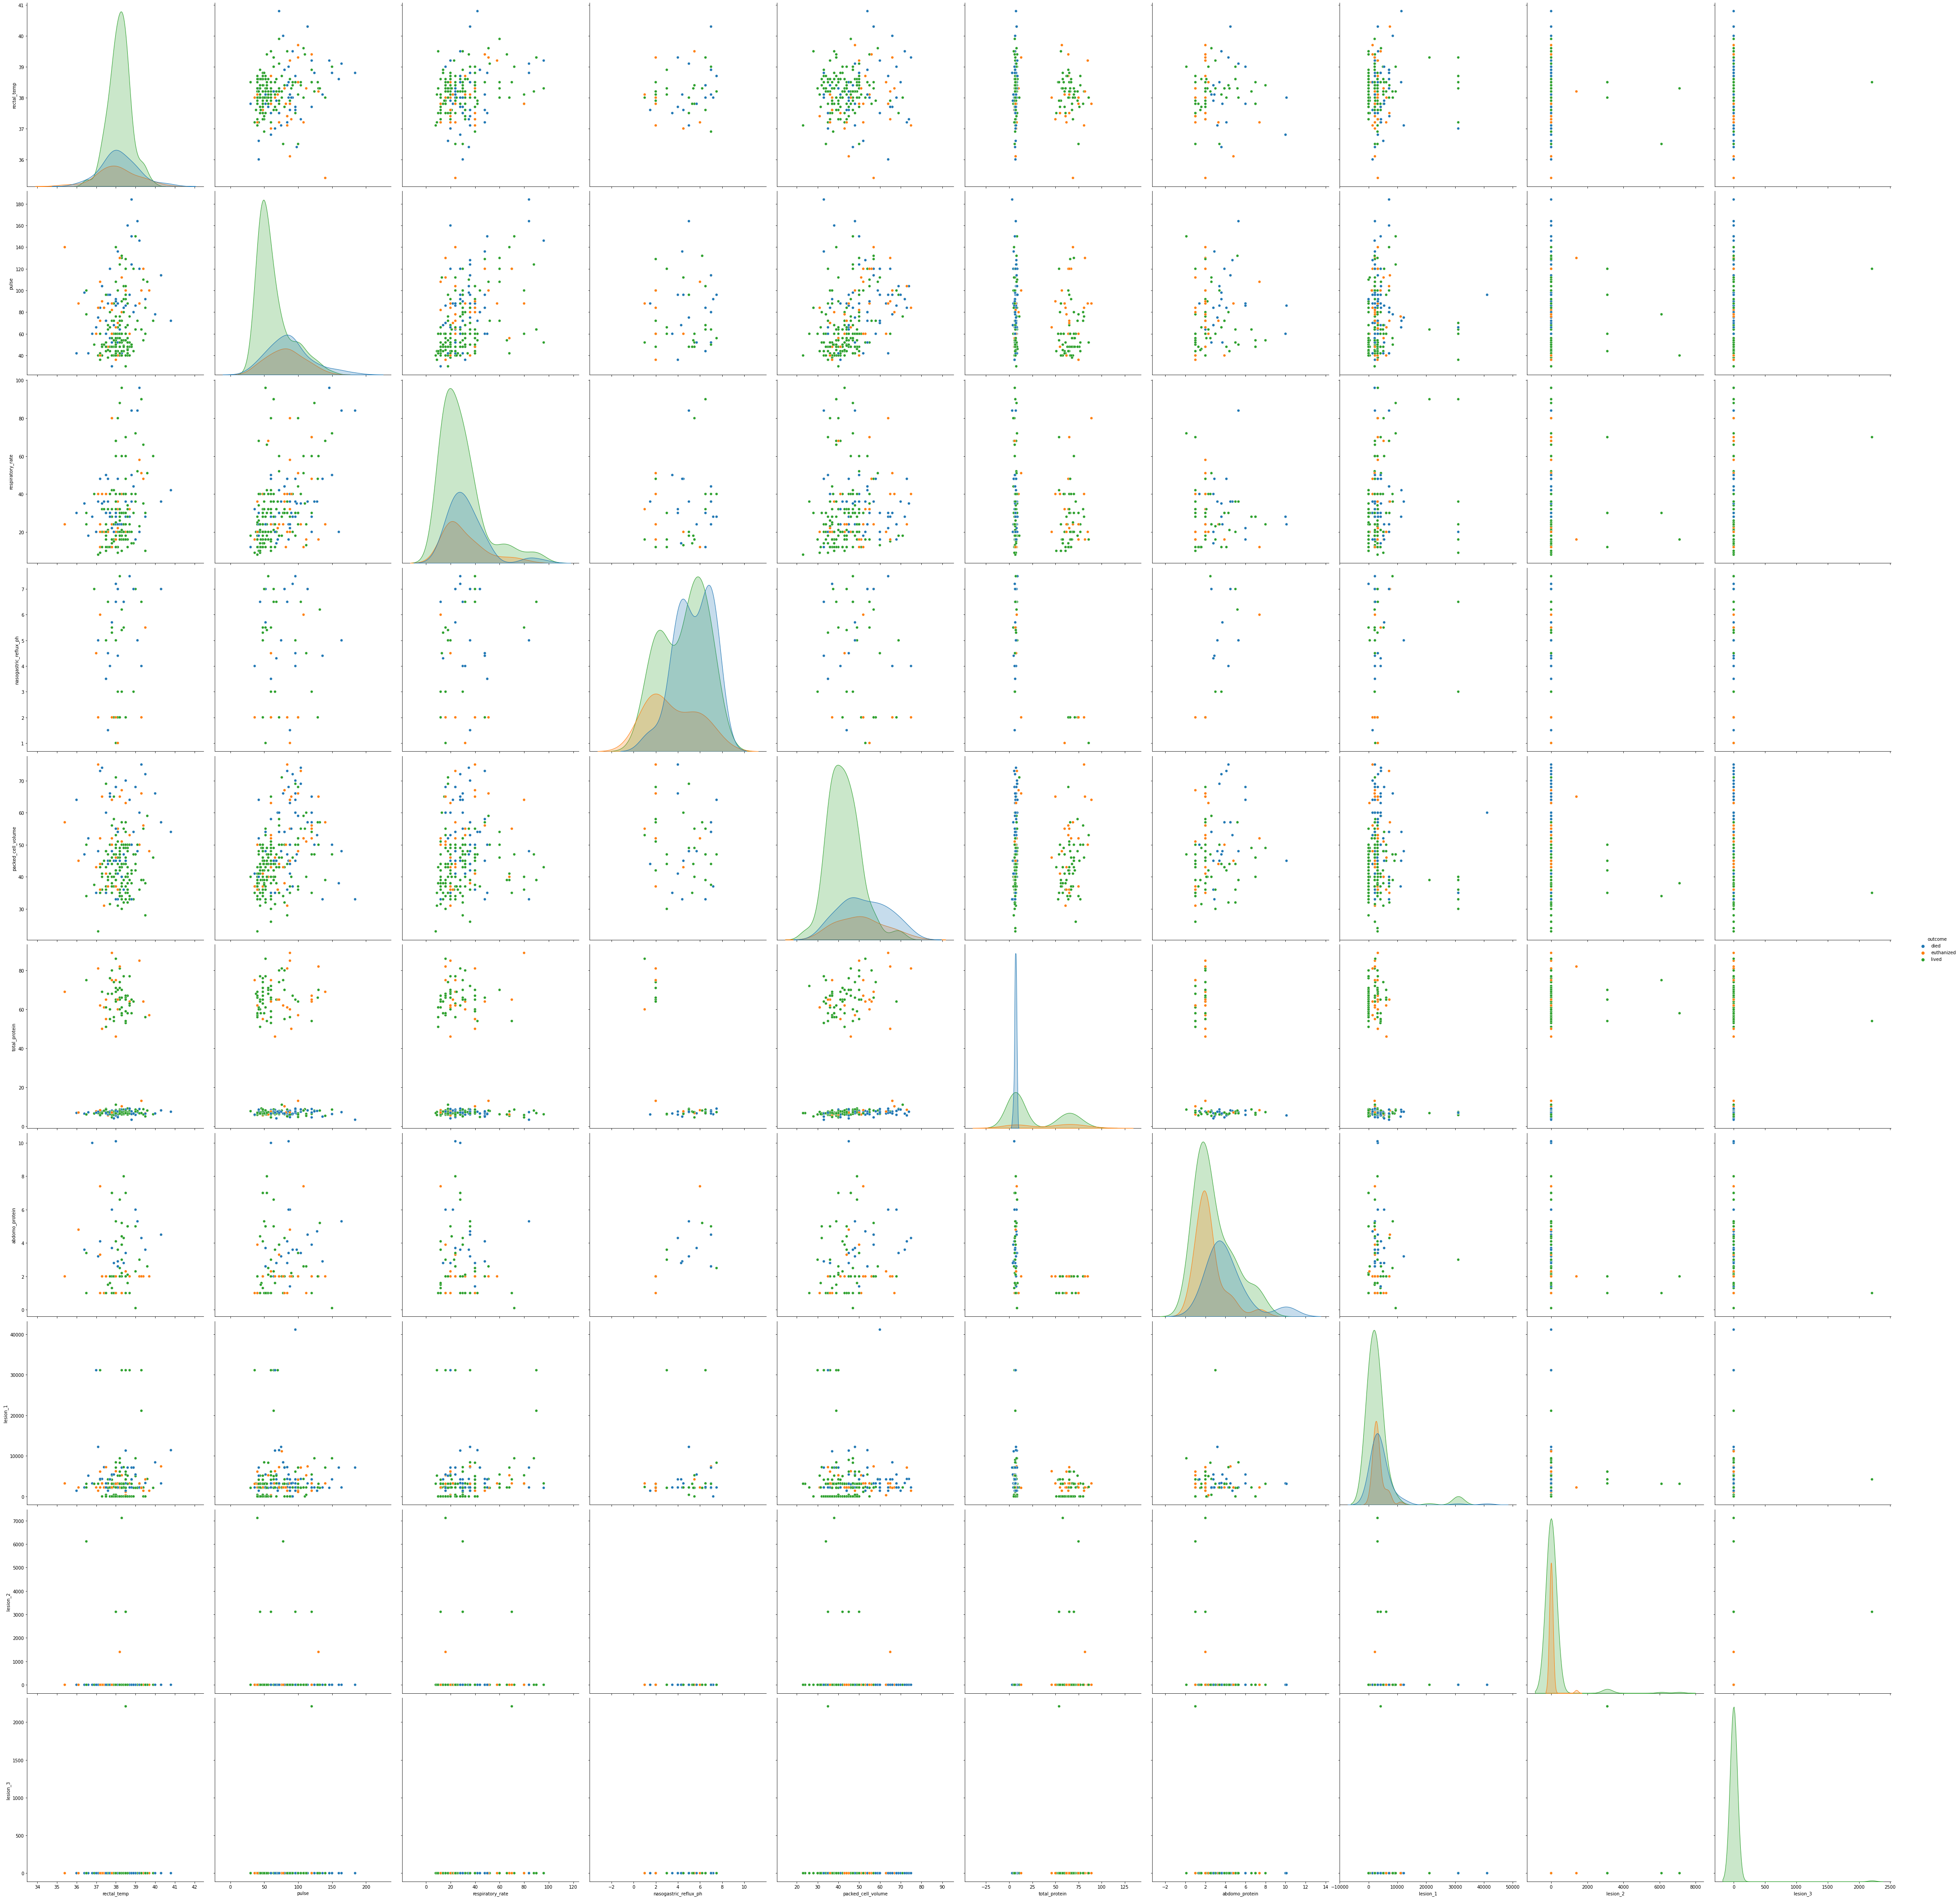

In [20]:
#Understanding the relationship between all the features
sns.pairplot(df, hue =target, size=6)
plt.show()

## Data Processing

In [21]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = df.shape

df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')

    


Inference: The dataset doesn't have any duplicates


In [22]:
#Check for empty elements

nvc = pd.DataFrame(df1.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df1.shape[0],3)*100
print(nvc)

                       Total Null Values  Percentage
surgery                                0         0.0
lesion_2                               0         0.0
lesion_1                               0         0.0
surgical_lesion                        0         0.0
outcome                                0         0.0
lesion_3                               0         0.0
cp_data                                0         0.0
age                                    0         0.0
pulse                                 24         8.0
packed_cell_volume                    29         9.7
capillary_refill_time                 32        10.7
total_protein                         33        11.0
peristalsis                           44        14.7
mucous_membrane                       47        15.7
pain                                  55        18.4
abdominal_distention                  56        18.7
temp_of_extremities                   56        18.7
respiratory_rate                      58      

In [23]:
 #Converting categorical Columns to Numeric

df1 = df.copy()
ecc = nvc[nvc['Percentage']!=0].index.values
dcc = [i for i in df.columns if i not in ecc]

#Target Variable
MAP={}
for i,e in enumerate(df1[target].unique()):
    MAP[e]=i
df1[target]=df1[target].map(MAP)
print('Mapping Target variable --->',MAP)

df3 = df1[dcc]
fcc = [i for i in cf if i not in ecc]

#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1m\nOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

Mapping Target variable ---> {'died': 0, 'euthanized': 1, 'lived': 2}

One-Hot Encoding on features:
surgery
surgical_lesion
lesion_3
cp_data
age

Dummy Encoding on features:
lesion_2


(299, 12)

In [24]:
# Fixing Empty Categorical Columns

for x in [i for i in ecc if i in cf]:
    a = df1[x]
    b=[]; c=[]

    for i,e in enumerate(a):
        if e!=e:
            b.append(i)
        else:
            c.append(i)

    RF = RandomForestClassifier()
    RF.fit(df3.loc[c],a[c])
    d = RF.predict(df3.loc[b])

    df3[x] = a
    f=0
    for i,e in enumerate(df3[x]):
        if e!=e:
            df3.loc[i,x] = d[f]
            f+=1
    df3 = pd.concat([df3.drop([x], axis=1), pd.DataFrame(pd.get_dummies(df3[x], drop_first=True, prefix=str(x)))],axis=1)   
df3

,surgery,age,outcome,surgical_lesion,lesion_1,lesion_3,cp_data,lesion_2_1400,lesion_2_3111,lesion_2_3112,...,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious
0,0,0,0,0,11300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,2208,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
2,0,0,2,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,1,0,1,2208,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,4300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,1,0,3205,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
295,0,0,1,1,2208,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1
296,1,0,0,1,3205,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
297,1,0,2,1,2208,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [25]:
# Fixing Empty Numerical Columns

from sklearn.linear_model import LinearRegression
for x in [i for i in ecc if i not in cf]:
    a = df1[x]
    b=[]; c=[]

    for i,e in enumerate(a):
        if e!=e:
            b.append(i)
        else:
            c.append(i)

    LR = LinearRegression()
    LR.fit(df3.loc[c],a[c])
    d = LR.predict(df3.loc[b])

    df3[x] = a
    f=0
    for i,e in enumerate(df3[x]):
        if e!=e:
            df3.loc[i,x] = d[f]
            f+=1
df3

,surgery,age,outcome,surgical_lesion,lesion_1,lesion_3,cp_data,lesion_2_1400,lesion_2_3111,lesion_2_3112,...,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,pulse,packed_cell_volume,total_protein,respiratory_rate,rectal_temp,abdomo_protein,nasogastric_reflux_ph
0,0,0,0,0,11300,0,0,0,0,0,...,0,0,1,66.0,45.0,8.400000,28.0,38.50000,2.787587,5.864427
1,1,0,1,0,2208,0,0,0,0,0,...,1,1,0,88.0,50.0,85.000000,20.0,39.20000,2.000000,-8.126677
2,0,0,2,0,0,0,1,0,0,0,...,0,0,0,40.0,33.0,6.700000,24.0,38.30000,4.902091,4.179207
3,1,1,0,1,2208,0,1,0,0,0,...,0,0,1,164.0,48.0,7.200000,84.0,39.10000,5.300000,5.000000
4,0,0,0,0,4300,0,0,0,0,0,...,0,0,1,104.0,74.0,7.400000,35.0,37.30000,3.568600,8.057305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,1,0,3205,0,0,0,0,0,...,0,1,0,120.0,55.0,65.000000,70.0,38.98935,3.588486,-4.127086
295,0,0,1,1,2208,0,1,0,0,0,...,0,0,1,72.0,44.0,-5.277449,24.0,37.20000,3.300000,8.884928
296,1,0,0,1,3205,0,0,0,0,0,...,0,0,1,72.0,60.0,6.800000,30.0,37.50000,5.103878,1.608050
297,1,0,2,1,2208,0,1,0,0,0,...,0,0,1,100.0,50.0,6.000000,24.0,36.50000,3.400000,2.082737


In [26]:
#Removal of outlier:

df4 = df3.copy()

for i in [i for i in df4.columns]:
    if df4[i].nunique()>=12:
        Q1 = df4[i].quantile(0.20)
        Q3 = df4[i].quantile(0.80)
        IQR = Q3 - Q1
        df4 = df4[df4[i] <= (Q3+(1.5*IQR))]
        df4 = df4[df4[i] >= (Q1-(1.5*IQR))]
df4 = df4.reset_index(drop=True)
display(df4.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(df1.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df4.shape[0]))

,surgery,age,outcome,surgical_lesion,lesion_1,lesion_3,cp_data,lesion_2_1400,lesion_2_3111,lesion_2_3112,...,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,pulse,packed_cell_volume,total_protein,respiratory_rate,rectal_temp,abdomo_protein,nasogastric_reflux_ph
0,1,0,1,0,2208,0,0,0,0,0,...,1,1,0,88.000000,50.00000,85.000000,20.000000,39.200000,2.000000,-8.126677
1,0,0,2,0,0,0,1,0,0,0,...,0,0,0,40.000000,33.00000,6.700000,24.000000,38.300000,4.902091,4.179207
2,0,0,0,0,4300,0,0,0,0,0,...,0,0,1,104.000000,74.00000,7.400000,35.000000,37.300000,3.568600,8.057305
3,0,0,2,0,0,0,0,0,0,0,...,0,0,0,52.192171,39.59126,35.690148,28.090066,37.882495,-0.810526,5.405664
4,1,0,2,1,3124,0,0,0,0,0,...,0,0,0,48.000000,37.00000,7.000000,16.000000,37.900000,5.287152,10.744045



Inference: Before removal of outliers, The dataset had 299 samples.
Inference: After removal of outliers, The dataset now has 266 samples.


In [27]:
#Fixing the imbalance using SMOTE Technique

df5 = df4.copy()

print('Original class distribution:')
print(df5[target].value_counts())

xf = df5.columns
X = df5.drop([target],axis=1)
Y = df5[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
2    165
0     62
1     39
Name: outcome, dtype: int64

Class distribution after applying SMOTE Technique:
1    165
2    165
0    165
Name: outcome, dtype: int64


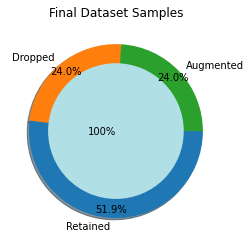


Inference:The final dataset after cleanup has 495 samples & 55 columns.


In [28]:
#Final Dataset size after performing Preprocessing

df = df5.copy()
plt.title('Final Dataset Samples')
plt.pie([df.shape[0], df.shape[0]-df4.shape[0], df5.shape[0]-df4.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} columns.'.format(df.shape[0], df.shape[1]))

## Data Manipulation

In [29]:
#Splitting the data intro training & testing sets

df = df5.copy()

X = df.drop([target],axis=1)
Y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  --> ',X.shape,Y.shape,'\nTraining set  --> ',X_train.shape,'', y_train.shape,'\nTesting set   --> ', X_test.shape,'', y_test.shape)

Original set  -->  (495, 54) (495,) 
Training set  -->  (396, 54)  (396,) 
Testing set   -->  (99, 54)  (99,)


In [30]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('Standardardization on Training set'.center(100))
X_train_std = std.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=X.columns)
display(X_train_std.describe())

print('Standardardization on Testing set'.center(100))
X_test_std = std.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X.columns)
display(X_test_std.describe())

                                 Standardardization on Training set                                 


,surgery,age,surgical_lesion,lesion_1,lesion_3,cp_data,lesion_2_1400,lesion_2_3111,lesion_2_3112,lesion_2_6112,...,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,pulse,packed_cell_volume,total_protein,respiratory_rate,rectal_temp,abdomo_protein,nasogastric_reflux_ph
count,3.960000e+02,3.960000e+02,3.960000e+02,3.960000e+02,3.960000e+02,3.960000e+02,396.0,3.960000e+02,3.960000e+02,3.960000e+02,...,3.960000e+02,3.960000e+02,3.960000e+02,3.960000e+02,3.960000e+02,3.960000e+02,3.960000e+02,3.960000e+02,3.960000e+02,3.960000e+02
mean,-1.435440e-16,-2.242875e-18,2.691450e-17,-3.140025e-17,-8.971499e-18,5.382900e-17,0.0,-4.485750e-17,-8.971499e-18,-8.971499e-18,...,1.794300e-17,4.037175e-17,-1.794300e-17,2.332590e-16,-4.485750e-17,-1.390582e-16,-3.925031e-17,5.008339e-15,3.633457e-16,-1.188724e-16
std,1.001265e+00,1.001265e+00,1.001265e+00,1.001265e+00,1.001265e+00,1.001265e+00,0.0,1.001265e+00,1.001265e+00,1.001265e+00,...,1.001265e+00,1.001265e+00,1.001265e+00,1.001265e+00,1.001265e+00,1.001265e+00,1.001265e+00,1.001265e+00,1.001265e+00,1.001265e+00
min,-1.147079e+00,-1.984189e-01,-1.301491e+00,-1.562292e+00,-5.031546e-02,-5.031546e-01,0.0,-7.124705e-02,-5.031546e-02,-5.031546e-02,...,-2.244947e-01,-5.384257e-01,-7.111283e-01,-1.848467e+00,-2.470930e+00,-1.212204e+00,-2.279114e+00,-3.057622e+00,-2.500168e+00,-2.939266e+00
25%,-1.147079e+00,-1.984189e-01,-1.301491e+00,-3.729826e-01,-5.031546e-02,-5.031546e-01,0.0,-7.124705e-02,-5.031546e-02,-5.031546e-02,...,-2.244947e-01,-5.384257e-01,-7.111283e-01,-8.840257e-01,-7.480612e-01,-7.127396e-01,-7.839969e-01,-5.866448e-01,-6.590367e-01,-5.702120e-01
50%,8.717798e-01,-1.984189e-01,7.683498e-01,-3.253878e-01,-5.031546e-02,-5.031546e-01,0.0,-7.124705e-02,-5.031546e-02,-5.031546e-02,...,-2.244947e-01,-5.384257e-01,-7.111283e-01,-3.259721e-02,-1.023617e-01,-6.561163e-01,-1.439098e-01,-1.669894e-01,-5.544856e-02,6.335686e-02
75%,8.717798e-01,-1.984189e-01,7.683498e-01,2.323108e-01,-5.031546e-02,-5.031546e-01,0.0,-7.124705e-02,-5.031546e-02,-5.031546e-02,...,-2.244947e-01,-5.384257e-01,1.406216e+00,7.697013e-01,6.891876e-01,9.469944e-01,4.890050e-01,6.073497e-01,6.730913e-01,6.664615e-01
max,8.717798e-01,5.039841e+00,7.683498e-01,3.701129e+00,1.987461e+01,1.987461e+00,0.0,1.403567e+01,1.987461e+01,1.987461e+01,...,4.454448e+00,1.857266e+00,1.406216e+00,3.375588e+00,2.562277e+00,2.432331e+00,3.353259e+00,3.119820e+00,3.073844e+00,2.816830e+00


                                 Standardardization on Testing set                                  


,surgery,age,surgical_lesion,lesion_1,lesion_3,cp_data,lesion_2_1400,lesion_2_3111,lesion_2_3112,lesion_2_6112,...,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,pulse,packed_cell_volume,total_protein,respiratory_rate,rectal_temp,abdomo_protein,nasogastric_reflux_ph
count,99.000000,99.000000,99.000000,99.000000,9.900000e+01,99.000000,99.000000,99.000000,9.900000e+01,9.900000e+01,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.096864,0.066140,-0.005227,0.165254,-5.031546e-02,0.125789,0.010101,0.071247,-5.031546e-02,-5.031546e-02,...,0.059078,-0.078646,0.080202,-0.112697,-0.064410,-0.071418,-0.054835,-0.091527,0.011950,0.104751
std,0.986806,1.152936,1.006475,1.048337,6.974207e-18,1.087582,0.100504,1.417798,1.394841e-17,2.092262e-17,...,1.122107,0.948248,1.029574,0.946212,0.995927,0.970369,0.960665,0.899307,0.910964,1.044062
min,-1.147079,-0.198419,-1.301491,-1.562292,-5.031546e-02,-0.503155,0.000000,-0.071247,-5.031546e-02,-5.031546e-02,...,-0.224495,-0.538426,-0.711128,-1.451255,-2.569620,-1.500944,-1.738748,-2.881123,-2.269744,-2.438927
25%,-1.147079,-0.198419,-1.301491,-0.327628,-5.031546e-02,-0.503155,0.000000,-0.071247,-5.031546e-02,-5.031546e-02,...,-0.224495,-0.538426,-0.711128,-0.884026,-0.743849,-0.705742,-0.783997,-0.684450,-0.669932,-0.592170
50%,0.871780,-0.198419,0.768350,0.179677,-5.031546e-02,-0.503155,0.000000,-0.071247,-5.031546e-02,-5.031546e-02,...,-0.224495,-0.538426,-0.711128,-0.110722,-0.102362,-0.663250,-0.134100,-0.057150,-0.023296,0.240505
75%,0.871780,-0.198419,0.768350,0.792249,-5.031546e-02,0.742153,0.000000,-0.071247,-5.031546e-02,-5.031546e-02,...,-0.224495,-0.538426,1.406216,0.482266,0.683617,0.323318,0.541855,0.328994,0.648528,0.759358
max,0.871780,5.039841,0.768350,3.477154,-5.031546e-02,1.987461,1.000000,14.035669,-5.031546e-02,-5.031546e-02,...,4.454448,1.857266,1.406216,2.441653,2.364896,2.273847,3.184868,2.698383,2.510140,2.334291


## Feature Selection

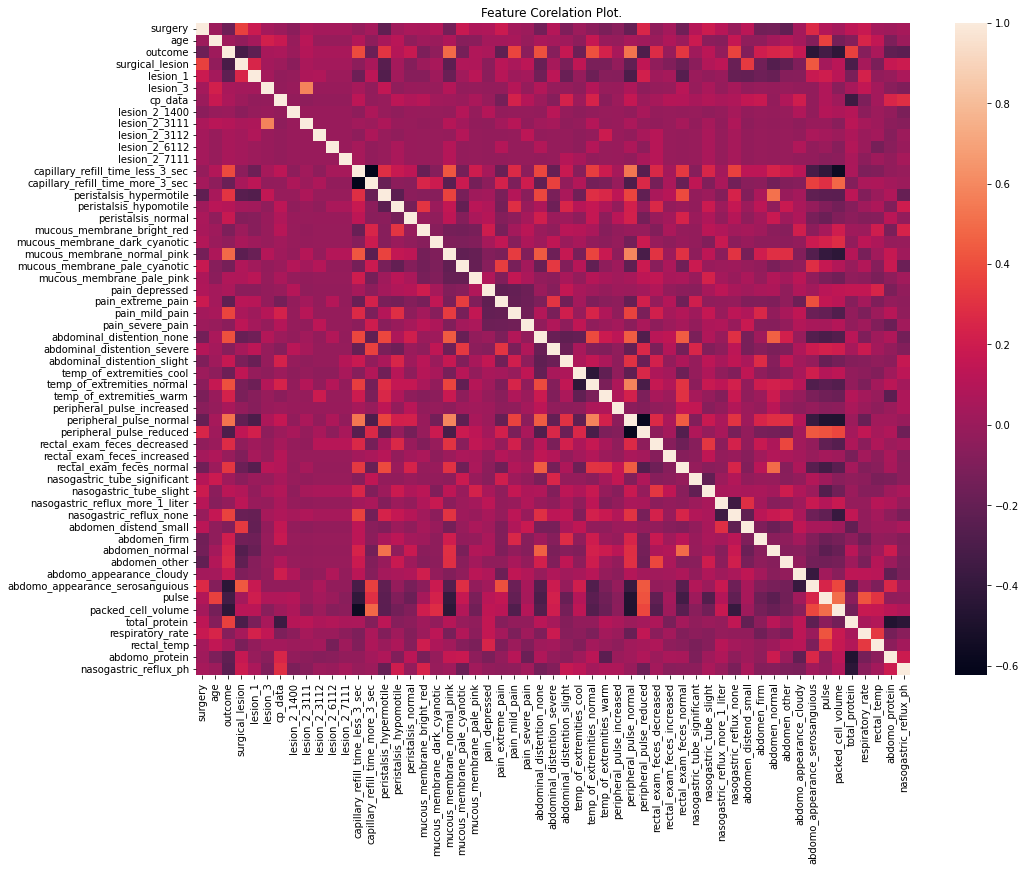

In [31]:
#Checking corelation

plt.figure(figsize=(16,12))
plt.title("Feature Corelation Plot. ")
sns.heatmap(df[df.columns].corr())
plt.show()

In [32]:
cor=pd.DataFrame(df[df.columns].corr())
cor.tail(10)

,surgery,age,outcome,surgical_lesion,lesion_1,lesion_3,cp_data,lesion_2_1400,lesion_2_3111,lesion_2_3112,...,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,pulse,packed_cell_volume,total_protein,respiratory_rate,rectal_temp,abdomo_protein,nasogastric_reflux_ph
abdomen_other,-0.213759,0.093230,0.259869,-0.223483,-0.076415,-0.010377,0.083427,-0.010377,-0.018009,-0.010377,...,1.000000,-0.032490,-0.147375,-0.153690,-0.132381,0.011245,-0.118415,0.101514,0.004489,-0.108208
abdomo_appearance_cloudy,0.035652,0.040650,0.167740,-0.099744,-0.067191,-0.023768,0.204492,0.085169,-0.041251,-0.023768,...,-0.032490,1.000000,-0.382067,0.026360,-0.064058,0.133136,0.129060,0.115118,-0.214198,-0.117158
abdomo_appearance_serosanguious,0.265106,-0.083587,-0.437682,0.433056,0.169701,-0.032540,-0.031851,-0.032540,-0.001661,0.062209,...,-0.147375,-0.382067,1.000000,0.241694,0.373221,-0.228333,-0.000072,-0.104789,0.253072,0.024971
pulse,0.091819,0.353550,-0.332998,0.041240,0.207354,0.081416,0.084895,0.099687,-0.002446,0.037567,...,-0.153690,0.026360,0.241694,1.000000,0.501003,-0.054174,0.420138,0.305731,-0.034351,-0.022771
packed_cell_volume,0.040892,-0.140028,-0.426017,0.113262,0.123453,-0.061841,0.019948,0.071565,-0.063595,0.004862,...,-0.132381,-0.064058,0.373221,0.501003,1.000000,-0.141269,0.170059,0.165174,0.122597,0.086420
total_protein,0.131965,-0.078456,0.354751,-0.305723,-0.120622,0.053376,-0.362251,0.103611,0.120662,0.073111,...,0.011245,0.133136,-0.228333,-0.054174,-0.141269,1.000000,0.054382,0.088150,-0.476317,-0.435246
respiratory_rate,0.170670,0.243318,-0.075356,0.046528,0.227440,0.145432,-0.103269,-0.049517,0.047728,0.001025,...,-0.118415,0.129060,-0.000072,0.420138,0.170059,0.054382,1.000000,0.327213,-0.132987,-0.059381
rectal_temp,0.033579,0.148420,0.058427,-0.122041,-0.028691,0.030612,0.031655,0.006316,0.014428,0.030612,...,0.101514,0.115118,-0.104789,0.305731,0.165174,0.088150,0.327213,1.000000,-0.048699,0.035510
abdomo_protein,0.022222,-0.103236,-0.221990,0.168430,-0.013885,-0.058809,0.251875,-0.030305,-0.051936,-0.074134,...,0.004489,-0.214198,0.253072,-0.034351,0.122597,-0.476317,-0.132987,-0.048699,1.000000,0.194613
nasogastric_reflux_ph,0.046475,0.009564,-0.240033,0.193366,0.065463,-0.100642,0.288469,-0.109716,-0.070178,0.007396,...,-0.108208,-0.117158,0.024971,-0.022771,0.086420,-0.435246,-0.059381,0.035510,0.194613,1.000000


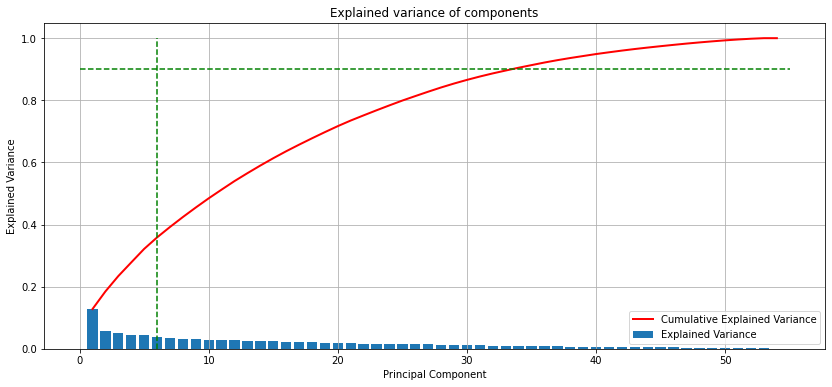

In [33]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_std)

fig, ax = plt.subplots(figsize=(14,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.90,0.90],'g--')
plt.plot([6,6],[0,1], 'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.show()


## Predictive model

In [34]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((4,3)), columns=['Accuracy', 'Recall','F1-score'])
Evaluation_Results.index=['Logistic Regression (LR)','Random Forest Classifier (RF)',
                         'Support Vector Machine (SVM)','Voting Classifier']
Evaluation_Results

,Accuracy,Recall,F1-score
Logistic Regression (LR),0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0
Voting Classifier,0.0,0.0,0.0


In [35]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(y_test, pred),3)*100   
    #Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(y_test, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(y_test, pred, average='weighted'),3)*100 #

### Logistic Regression

In [36]:
# Building Logistic Regression Classifier

LR_model = LogisticRegression(C=100,random_state=43)
LR = LR_model.fit(X_train_std, y_train)#.best_estimator_
pred = LR.predict(X_test_std)
#pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,0)
print("Accuracy Score: ",accuracy_score(pred, y_test))
print("Recall score: ", recall_score(pred, y_test, average='weighted'))
print("F1 score: ", f1_score(pred, y_test, average='weighted'))

Accuracy Score:  0.8585858585858586
Recall score:  0.8585858585858586
F1 score:  0.8610447464723936


### Random Forest Classifier

In [37]:
# Building Random-Forest Classifier

RF_model = RandomForestClassifier(criterion='entropy',
                                 n_estimators=10, 
                                 random_state=43,
                                 n_jobs=2)
RF = RF_model.fit(X_train_std, y_train)#.best_estimator_
pred = RF.predict(X_test_std)
#pred_prob = RF.predict_proba(X_test_std)
Classification_Summary(pred,1)
print("Accuracy Score: ",accuracy_score(pred, y_test))
print("Recall score: ", recall_score(pred, y_test, average='weighted'))
print("F1 score: ", f1_score(pred, y_test, average='weighted'))

Accuracy Score:  0.8585858585858586
Recall score:  0.8585858585858586
F1 score:  0.8588121621435474


### Support vector machine

In [38]:
# Building Support Vector Machine Classifier

svm_model= SVC(kernel='linear', C=1, random_state=43)
svm=svm_model.fit(X_train_std, y_train)
pred=svm.predict(X_test_std)
Classification_Summary(pred,2)
print("Accuracy Score: ",accuracy_score(pred, y_test))
print("Recall score: ", recall_score(pred, y_test, average='weighted'))
print("F1 score: ", f1_score(pred, y_test, average='weighted'))

Accuracy Score:  0.898989898989899
Recall score:  0.898989898989899
F1 score:  0.8994137175955358


## Ensembling by voting Classifier

In [39]:
from sklearn.ensemble import VotingClassifier

ensemble=VotingClassifier(estimators=[('LR',LR_model), ('RF',RF_model), ('SVM',svm_model)],voting='hard')
ensemble.fit(X_train_std, y_train)
pred= ensemble.predict(X_test_std)
Classification_Summary(pred,3)
print("Accuracy Score: ",accuracy_score(pred, y_test))
print("Recall score: ", recall_score(pred, y_test, average='weighted'))
print("F1 score: ", f1_score(pred, y_test, average='weighted'))

Accuracy Score:  0.8686868686868687
Recall score:  0.8686868686868687
F1 score:  0.8696106082469719


#### Comparing all the model

                                    ML Algorithms Comparison                                    


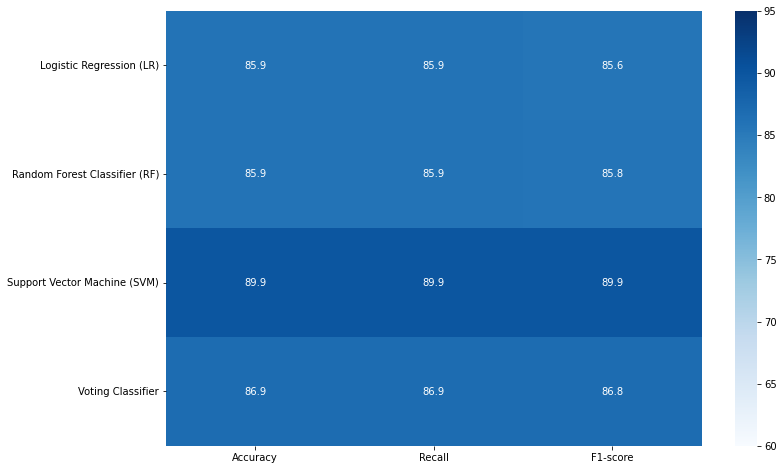

In [40]:
#Comparing all the models Scores

print('\033[1mML Algorithms Comparison'.center(100))
plt.figure(figsize=[12,8])
sns.heatmap(Evaluation_Results, annot=True, vmin=60, vmax=95, cmap='Blues', fmt='.1f')
plt.show()

In [41]:
from sklearn.model_selection import cross_val_score

CrossValidation = pd.DataFrame(np.zeros((3,2)), columns=['Best Score','Average Score'])
CrossValidation.index=['Logistic Regression (LR)','Random Forest Classifier (RF)',
                         'Support Vector Machine (SVM)']
def AfterCrossValidation(score,i):
    CrossValidation.iloc[i]['Best Score']=round(np.max(score),3)*100   
    CrossValidation.iloc[i]['Average Score']=round(np.average(score),3)*100 #


In [42]:
#Cross validation for logisticRegression
score=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train_std, y_train,cv=3)
print(score)
print("Avg :",np.average(score))
print("Avg :",np.max(score))
AfterCrossValidation(score, 0)

[0.77272727 0.81060606 0.81060606]
Avg : 0.7979797979797979
Avg : 0.8106060606060606


In [43]:
#Cross validation for random forest classifier
score=cross_val_score(RandomForestClassifier(n_estimators=40),X_train_std, y_train,cv=3)
print(score)
print("Avg :",np.average(score))
print("Avg :",np.max(score))
AfterCrossValidation(score, 1)

[0.84848485 0.91666667 0.8030303 ]
Avg : 0.8560606060606061
Avg : 0.9166666666666666


In [44]:
#Cross validation for Support vector Machine
score_svm =cross_val_score(SVC(gamma='auto'), X_train_std, y_train,cv=3)
print(score)
print("Avg :",np.average(score))
print("Avg :",np.max(score))
AfterCrossValidation(score, 2)

[0.84848485 0.91666667 0.8030303 ]
Avg : 0.8560606060606061
Avg : 0.9166666666666666


                        ML Algorithms Comparison after cross validation                         


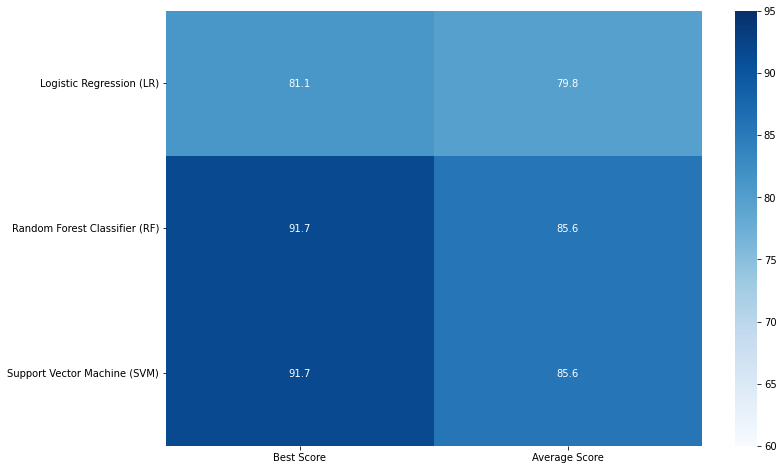

In [45]:
print('\033[1mML Algorithms Comparison after cross validation'.center(100))
plt.figure(figsize=[12,8])
sns.heatmap(CrossValidation, annot=True, vmin=60, vmax=95, cmap='Blues', fmt='.1f')
plt.show()

#### End of the project